In [1]:
from pathlib import Path
import menpo.io as mio
from menpo.visualize import print_progress

path_to_lfpw = Path('lfpw/')

def preprocess_img(img):
    img = img.crop_to_landmarks_proportion(0.1)
    if img.n_channels == 3:
        img = img.as_greyscale(mode='luminosity')
    return img

training_images = [preprocess_img(i) for i in mio.import_images(path_to_lfpw / 'trainset', verbose=True)] + [preprocess_img(i) for i in mio.import_images(path_to_lfpw / 'testset', verbose=True)]    

Found 811 assets, index the returned LazyList to import.
Found 224 assets, index the returned LazyList to import.


In [2]:
from menpofit.aam import HolisticAAM
from menpo.feature import no_op

# build AAM
aam = HolisticAAM(
    training_images,
    group='PTS',
    verbose=True,
    holistic_features=no_op, 
    diagonal=120, 
    scales=1
)

print(aam)

- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (1035/1035) - done.                
  - Warping images: [=         ] 11% (114/1035) - 00:00:00 remaining            

/Users/amit/Documents/CS269-Compressible-Models/env/lib/python3.7/site-packages/menpofit/builder.py:338: MenpoFitModelBuilderWarning: The reference shape passed is not a TriMesh or subclass and therefore the reference frame (mask) will be calculated via a Delaunay triangulation. This may cause small triangles and thus suboptimal warps.
  MenpoFitModelBuilderWarning)


  - Doneding appearance model                                                   
                                                                       Holistic Active Appearance Model
 - Images scaled to diagonal: 120.00
 - Images warped with DifferentiablePiecewiseAffine transform
 - Scales: [1]
   - Scale 1
     - Holistic feature: no_op
     - Appearance model class: PCAModel
       - 1034 appearance components
     - Shape model class: OrthoPDM
       - 132 shape components
       - 4 similarity transform parameters



In [3]:
from menpofit.aam import LucasKanadeAAMFitter

# define Lucas-Kanade based AAM fitter
fitter = LucasKanadeAAMFitter(aam, n_shape=0.9, n_appearance=0.9)

In [4]:
test_images = [preprocess_img(i) for i in mio.import_images(path_to_lfpw / 'testset', verbose=True)]

Found 224 assets, index the returned LazyList to import.


In [5]:
import time
from menpofit.fitter import noisy_shape_from_bounding_box

fitting_results = []

import time

# fit images
for i in test_images:
    # obtain ground truth (original) landmarks
    gt_s = i.landmarks['PTS']
    
    # generate initialization shape
    initial_s = noisy_shape_from_bounding_box(gt_s, gt_s.bounding_box())
    
    # fit image
    start = time.time()
    fr = fitter.fit_from_shape(i, initial_s, gt_shape=gt_s)
    end = time.time()
    print(end - start)
    fitting_results.append(fr)
    
    # print fitting error
    print(fr)

0.10041403770446777
Fitting result of 68 landmark points.
Initial error: 0.0660
Reconstructed initial error: 0.0668
Final error: 0.0413
0.08067798614501953
Fitting result of 68 landmark points.
Initial error: 0.0514
Reconstructed initial error: 0.0525
Final error: 0.0696
0.07871174812316895
Fitting result of 68 landmark points.
Initial error: 0.0482
Reconstructed initial error: 0.0506
Final error: 0.0318
0.08153104782104492
Fitting result of 68 landmark points.
Initial error: 0.0457
Reconstructed initial error: 0.0474
Final error: 0.0258
0.07556986808776855
Fitting result of 68 landmark points.
Initial error: 0.0406
Reconstructed initial error: 0.0417
Final error: 0.0552
0.0749821662902832
Fitting result of 68 landmark points.
Initial error: 0.0623
Reconstructed initial error: 0.0629
Final error: 0.0270
0.07847023010253906
Fitting result of 68 landmark points.
Initial error: 0.0668
Reconstructed initial error: 0.0675
Final error: 0.0333
0.07686901092529297
Fitting result of 68 landmark

0.0678551197052002
Fitting result of 68 landmark points.
Initial error: 0.0451
Reconstructed initial error: 0.0471
Final error: 0.0195
0.07262468338012695
Fitting result of 68 landmark points.
Initial error: 0.0572
Reconstructed initial error: 0.0585
Final error: 0.0300
0.07123684883117676
Fitting result of 68 landmark points.
Initial error: 0.0246
Reconstructed initial error: 0.0293
Final error: 0.0257
0.07250690460205078
Fitting result of 68 landmark points.
Initial error: 0.0849
Reconstructed initial error: 0.0862
Final error: 0.0468
0.07353997230529785
Fitting result of 68 landmark points.
Initial error: 0.0490
Reconstructed initial error: 0.0506
Final error: 0.0366
0.06810927391052246
Fitting result of 68 landmark points.
Initial error: 0.0571
Reconstructed initial error: 0.0590
Final error: 0.0460
0.07523703575134277
Fitting result of 68 landmark points.
Initial error: 0.0564
Reconstructed initial error: 0.0597
Final error: 0.0213
0.06750631332397461
Fitting result of 68 landmark

0.10487103462219238
Fitting result of 68 landmark points.
Initial error: 0.0715
Reconstructed initial error: 0.0757
Final error: 0.0857
0.08571720123291016
Fitting result of 68 landmark points.
Initial error: 0.0494
Reconstructed initial error: 0.0519
Final error: 0.1253
0.08199620246887207
Fitting result of 68 landmark points.
Initial error: 0.0411
Reconstructed initial error: 0.0439
Final error: 0.0274
0.08651185035705566
Fitting result of 68 landmark points.
Initial error: 0.0766
Reconstructed initial error: 0.0768
Final error: 0.1144
0.08118295669555664
Fitting result of 68 landmark points.
Initial error: 0.0299
Reconstructed initial error: 0.0336
Final error: 0.0247
0.08363175392150879
Fitting result of 68 landmark points.
Initial error: 0.0442
Reconstructed initial error: 0.0472
Final error: 0.0204
0.10869121551513672
Fitting result of 68 landmark points.
Initial error: 0.0547
Reconstructed initial error: 0.0563
Final error: 0.0275
0.11834192276000977
Fitting result of 68 landmar

0.09040999412536621
Fitting result of 68 landmark points.
Initial error: 0.0509
Reconstructed initial error: 0.0525
Final error: 0.0195
0.09806180000305176
Fitting result of 68 landmark points.
Initial error: 0.0424
Reconstructed initial error: 0.0446
Final error: 0.0363
0.09348320960998535
Fitting result of 68 landmark points.
Initial error: 0.0238
Reconstructed initial error: 0.0272
Final error: 0.0239
0.09989786148071289
Fitting result of 68 landmark points.
Initial error: 0.0476
Reconstructed initial error: 0.0495
Final error: 0.0388
0.09178709983825684
Fitting result of 68 landmark points.
Initial error: 0.0614
Reconstructed initial error: 0.0668
Final error: 0.0475
0.10088610649108887
Fitting result of 68 landmark points.
Initial error: 0.0566
Reconstructed initial error: 0.0578
Final error: 0.0270
0.09309220314025879
Fitting result of 68 landmark points.
Initial error: 0.0398
Reconstructed initial error: 0.0431
Final error: 0.0263
0.09488296508789062
Fitting result of 68 landmar

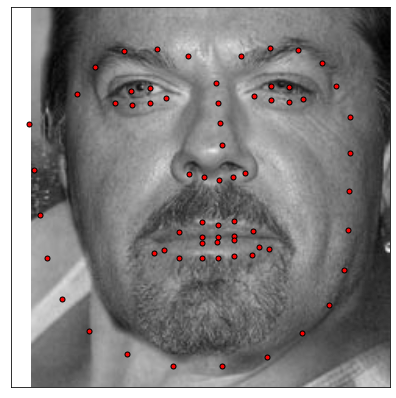

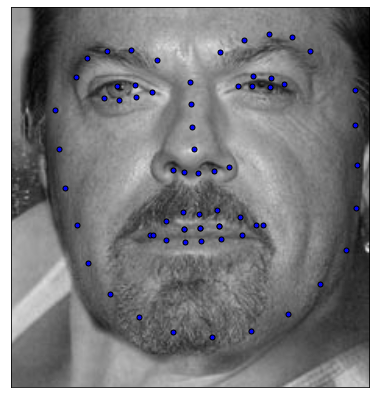

In [6]:
fr.image.view(new_figure=True);
fr.final_shape.view();

fr.image.view(new_figure=True);
fr.initial_shape.view(marker_face_colour='blue');

In [7]:
import pickle

with open('lk_aam_fitter.pkl', 'wb') as f:
    pickle.dump(fitter, f)